# 🎲 Logistic Regression

**Logistic regression** is a process of modeling the probability of a discrete outcome given an input variable. The most common logistic regression models a binary outcome; something that can take two values such as true/false, yes/no, and so on.

<center><img src="https://blog.developerspoint.org/assets/img/logistic_banner.jpg" width=900></center>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('bmh')

In [2]:
df_students = pd.read_csv('data/students.csv')

In [3]:
df_students.head()

,mark1,mark2,admitted
0,6.9247,15.605,0
1,6.0573,8.779,0
2,7.1695,14.580,0
3,12.0370,17.262,1
4,15.8070,15.069,1


In [4]:
features = ['mark1', 'mark2']
target = 'admitted'

In [5]:
X = df_students[features].values
y = df_students[target].values.astype(np.int32)
X.shape,y.shape

((100, 2), (100,))

In [6]:
X[:5]

array([[ 6.9247, 15.605 ],
       [ 6.0573,  8.779 ],
       [ 7.1695, 14.58  ],
       [12.037 , 17.262 ],
       [15.807 , 15.069 ]])

In [7]:
y[:5]

array([0, 0, 0, 1, 1])

In this dataset, the features represent the marks obtained by students on two subjects, and the target is the student being admitted to a major.

Let's reuse the functions we made on the previous notebook.

In [8]:
def add_theta_0(X):
  intercept = np.ones(len(X))
  X_stacked = np.vstack((intercept, X.T)).T
  return X_stacked

In [9]:
def initialize_theta(n_features,is_random=True):
  """
  Returns bias (intercept) and weight for a vector X of n features in the form of a ndarray [theta_0,theta_1,..., theta_n].
  theta_0 being the bias, and the others the weights.
  n has to be greater or equal to 1.
  
  Parameters:
  n_features: number of features of X. If errors occur, reshape(-1,1) your vector.
  is_random: if set to False, will set values of bias and theta to zero.
  """
  if is_random:
    return np.random.rand(n_features,1) 
  else:
    return np.zeros(shape=(n_features,1))

# Descente du Gradient : Préparation des fonctions

0- Fonction mpgistique (Sigmoid)

In [10]:
def sigmoid(z):
    # pour une valeur donnée, cette fonction calculera sa sigmoid
    return 1/(1+np.exp(-z))

In [11]:
def h_theta(X,theta):
  """
  This is the predict(X) function that returns y_hat.
  """
  return np.sum(np.matmul(X,theta),axis=1)

In [12]:
def get_cost(X,y,theta):   
           
    # initialize J (the cost)
    J = 0 

    # Calculate h = X * theta 
    h = h_theta(X,theta)
    
    # Calculate the Cost J
    J = mean_squared_error(y,h)
    
    return J

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [13]:
def mean_squared_error(y,h_theta):
  loss = h_theta - y
  m = len(y) 
  return 1/(2*m) * np.sum(loss ** 2)

In [14]:
import time
def gradient_descent(X, y, theta, num_iters=100, alpha=0.0001,verbose=False):
  """
  Parameters:
  X : training samples
  y : training labels
  num_iters : epoches of the algorithm to reach convergence
  alpha: step of the partial derivatives
  verbose : if set to True, will log the values of the cost and theta values.
  
  Returns theta updated values, cost_history and theta history.
  """
  start = time.time()
  # Number of training examples
  m = len(y)
                     
  # History of costs
  result_idx = 0
  gd_iterations_df = pd.DataFrame(columns=['iteration','cost']) 
  J_history = [] 
  theta_history = []
  
  for i in range(num_iters):
      # Step 1 : Calculate h = X * theta
      h = h_theta(X,theta)
      
      # Step 2 :Calculate the error = (h - y) 
      error = np.subtract(h, y)
      
      # Step 3 : Calculate the new theta
      theta_new = alpha * 1/m * np.sum(np.multiply(X.T, error))

      # Step 4 : Update theta
      theta = np.subtract(theta, theta_new)

      # Step 5 : Compute the cost to keep history of it
      cost = get_cost(X,y,theta)
      
      gd_iterations_df.loc[result_idx]=[i,cost]
      result_idx += 1
      
      J_history.append(cost)
      theta_history.append(theta.tolist())
      
      if verbose:
          print('{}/{} [>==================]  - loss: {:.2f} - theta = {}'.format(i+1,num_iters,cost,theta))
          
  print('Time spent: {:0.2f}s'.format(time.time()-start))
  return theta, theta_history, J_history,gd_iterations_df
    

# Descente du Gradient : Appel des fonctions

In [15]:
X = add_theta_0(X)
X[:5]

array([[ 1.    ,  6.9247, 15.605 ],
       [ 1.    ,  6.0573,  8.779 ],
       [ 1.    ,  7.1695, 14.58  ],
       [ 1.    , 12.037 , 17.262 ],
       [ 1.    , 15.807 , 15.069 ]])

Initialisation de $\theta_0$ et $\theta_1$

In [71]:
theta = initialize_theta(X.shape[1],is_random=False)
theta

array([[0.],
       [0.],
       [0.]])

In [72]:
initial_cost = get_cost(X,y,theta)
initial_cost

0.3

Appel des la fonction de calcul du gradient

In [73]:
# paramètres
iterations = 40000
my_alpha = 0.000001

In [74]:
# Appel
theta, theta_history, J_history,gd_iterations_df = gradient_descent(X, y, theta, num_iters=iterations, alpha=my_alpha)

Time spent: 37.56s


In [75]:
theta

array([[0.02372487],
       [0.02372487],
       [0.02372487]])

In [76]:
gd_iterations_df

,iteration,cost
0,0.0,0.299660
1,1.0,0.299321
2,2.0,0.298982
3,3.0,0.298643
4,4.0,0.298306
...,...,...
39995,39995.0,0.081244
39996,39996.0,0.081244
39997,39997.0,0.081244
39998,39998.0,0.081244


Traçage de la fonction du coût

Text(0, 0.5, 'Cost (J)')

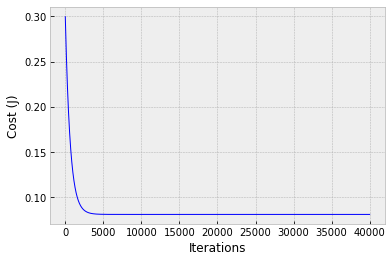

In [77]:
# Plot the J history
plt.plot(J_history[0:len(J_history)], color='blue', linewidth=1)
plt.xlabel("Iterations")
plt.ylabel("Cost (J)")

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

# Dessin de la limite de decision (Descision Boundary)
Dans cette partie, nous aimerions dessiner la ligne separatrice d nos données

In [ ]:
def drawLine():
  pass
    

# Affichage 
Graphe representant les acceptations selon les caracteristiques

In [37]:
admitted = X[np.where(y==1)]
rejected = X[np.where(y==0)]

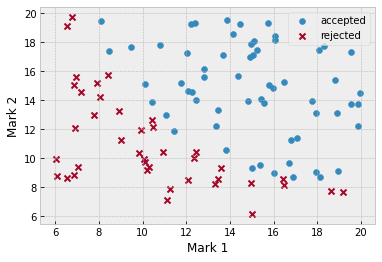

In [45]:
plt.scatter(admitted[:,1],admitted[:,2], label="accepted",marker ='o')
plt.scatter(rejected[:,1],rejected[:,2], label="rejected",marker ='x')
plt.xlabel('Mark 1')
plt.ylabel('Mark 2')
plt.legend()

Traçage du coût en fonction de theta0 et theta1

Prédire des valeurs de y

In [29]:
def predict_Y(X,theta):
  if X.shape[0] != theta.shape[0]:
    X = add_theta_0(X)
  return sigmoid(np.sum(X.dot(theta), axis=0))

In [30]:
# Predire pour des notes note1= 9 et note2=17
student1 = np.array([[9,17]])

In [78]:
predict1 = predict_Y(student1,theta)
predict1*100

array([65.48826504])

# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

In [ ]:
sample1 = X[:1]
print(sample1)

sample1.shape, theta.shape
print(np.matmul(sample1,theta))
print(np.sum(np.matmul(sample1,theta)))

two_samples = X[:2]
print(two_samples)

two_samples_target = y[:2]
print(two_samples_target)

print(np.matmul(two_samples,theta))
print(np.sum(np.matmul(two_samples,theta),axis=1))

# 📚 Ressources and References

1. *A logistic regression from scratch*,https://towardsdatascience.com/a-logistic-regression-from-scratch-3824468b1f88